<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


Summary Statistics for ConvertedCompYearly:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


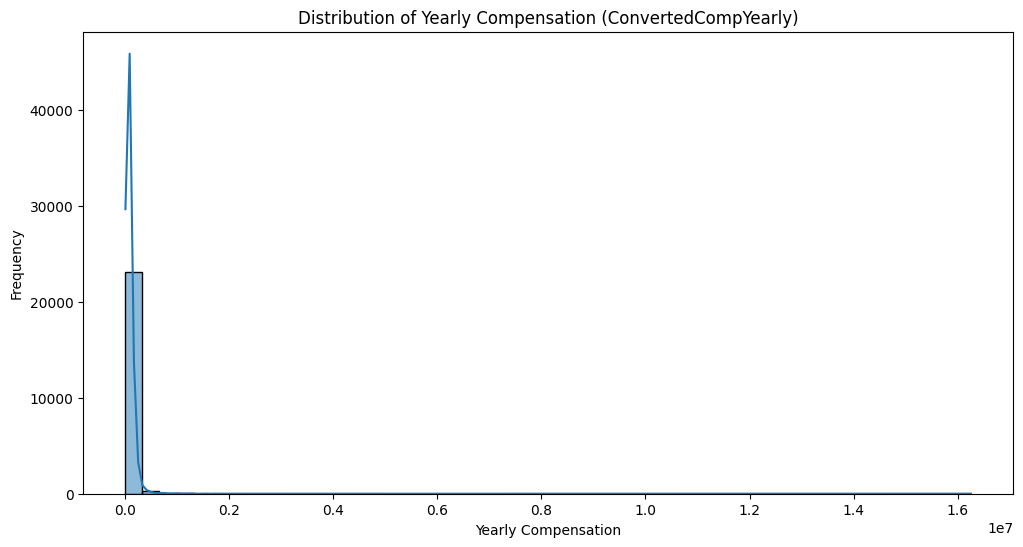

In [4]:
# Check basic stats
print("Summary Statistics for ConvertedCompYearly:")
print(df['ConvertedCompYearly'].describe())

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True)
plt.title("Distribution of Yearly Compensation (ConvertedCompYearly)")
plt.xlabel("Yearly Compensation")
plt.ylabel("Frequency")
plt.show()



<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [7]:
# Step 4: Calculate Median Compensation for Full-Time Employees

# 1. Filter full-time employees
full_time_df = df[df['Employment'] == "Employed, full-time"]


# 2. Calculate median compensation
median_comp = full_time_df['ConvertedCompYearly'].median()

print("Median Yearly Compensation for Full-Time Employees:")
print(median_comp)

Median Yearly Compensation for Full-Time Employees:
69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



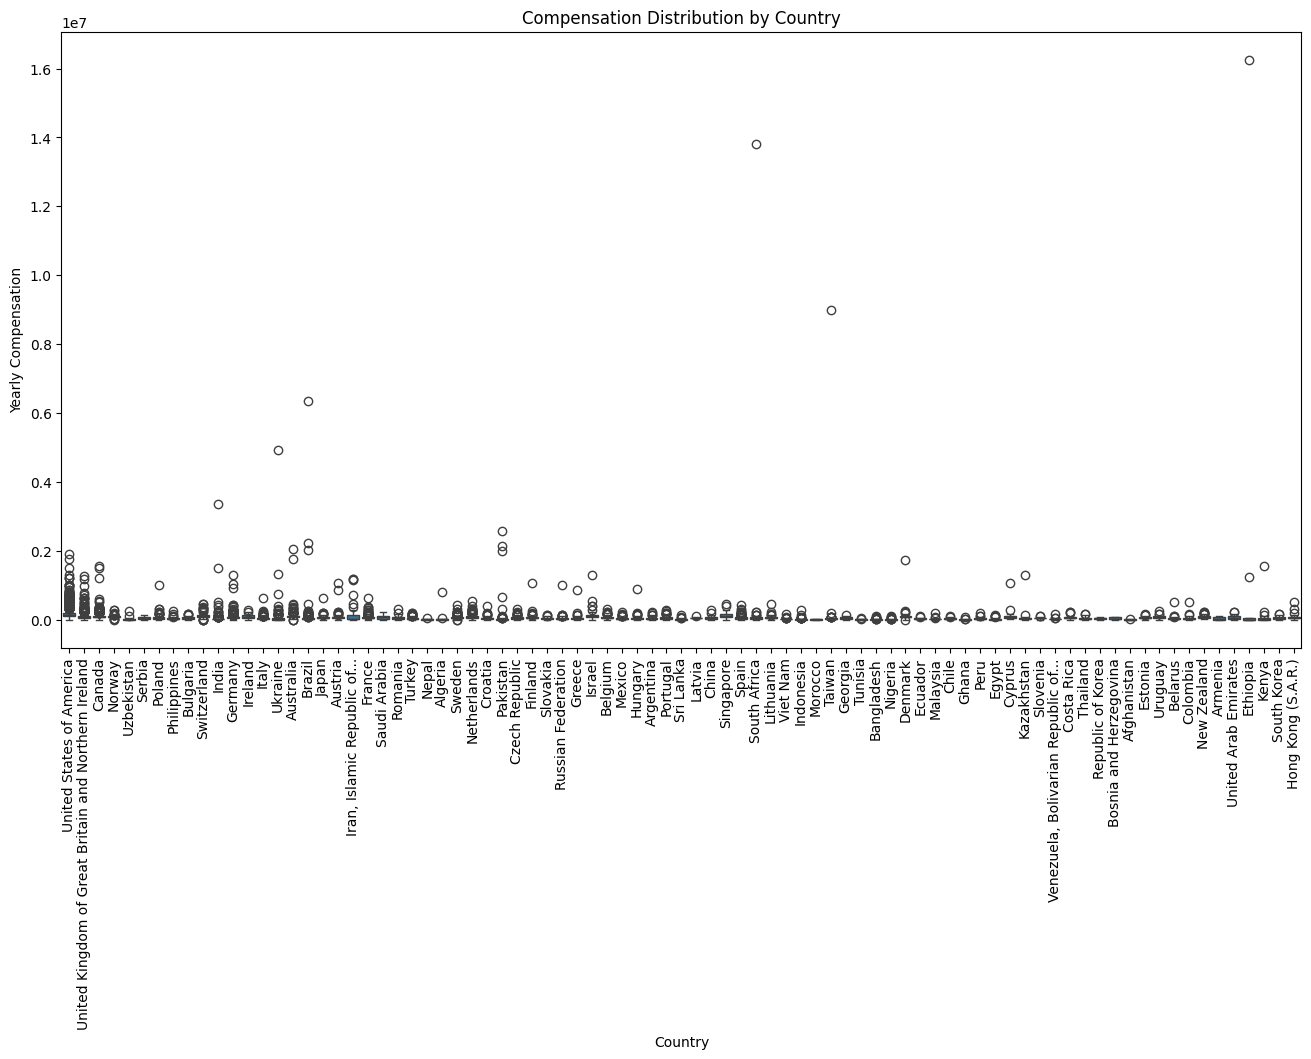

In [8]:
# Keep only countries with enough data (optional but avoids messy plots)
country_counts = df['Country'].value_counts()
valid_countries = country_counts[country_counts > 50].index  # threshold can be changed
df_country_filtered = df[df['Country'].isin(valid_countries)]

plt.figure(figsize=(16, 8))
sns.boxplot(
    data=df_country_filtered,
    x='Country',
    y='ConvertedCompYearly'
)
plt.xticks(rotation=90)
plt.title("Compensation Distribution by Country")
plt.ylabel("Yearly Compensation")
plt.xlabel("Country")
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [9]:
# Step 6: Removing Outliers from ConvertedCompYearly

Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['ConvertedCompYearly'] >= lower_bound) & 
              (df['ConvertedCompYearly'] <= upper_bound)]

print("Original DataFrame size:", df.shape)
print("Cleaned DataFrame size:", df_clean.shape)


Original DataFrame size: (65437, 114)
Cleaned DataFrame size: (22457, 114)


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Correlation Matrix:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.408438       -0.058170
WorkExp                         0.408438  1.000000       -0.032388
JobSatPoints_1                 -0.058170 -0.032388        1.000000


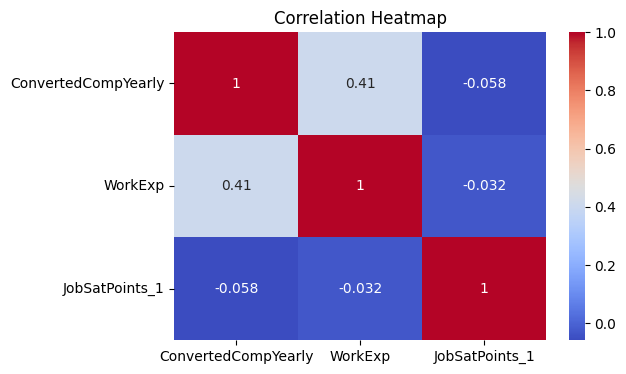

In [10]:
# Select the relevant columns from the cleaned dataset
corr_df = df_clean[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']]

# Compute correlation matrix
corr_matrix = corr_df.corr()

print("Correlation Matrix:")
print(corr_matrix)

# Visualize with heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


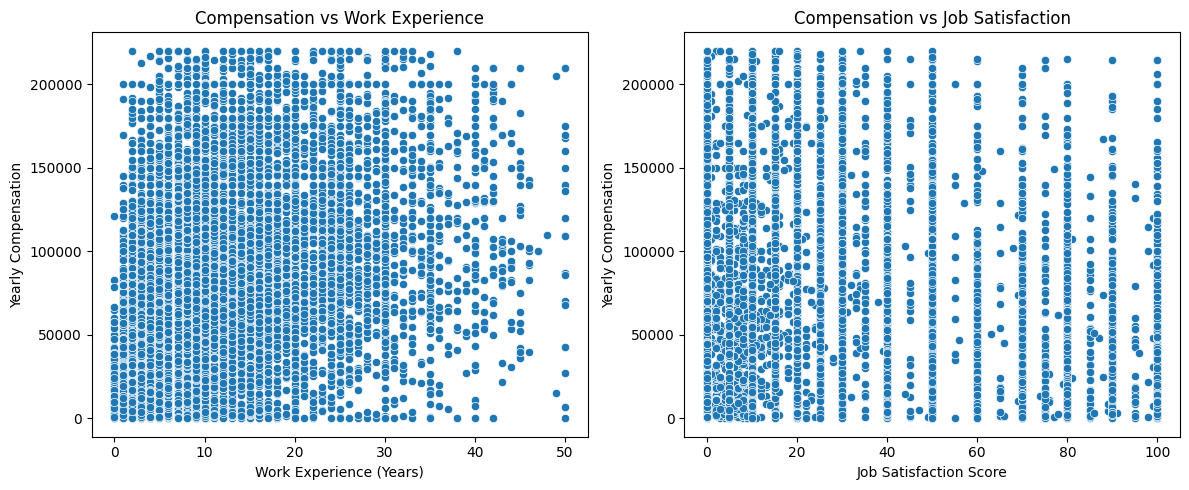

In [11]:
# Step 8: Scatter Plots for Key Relationships

plt.figure(figsize=(12, 5))

# Compensation vs Work Experience
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_clean, x='WorkExp', y='ConvertedCompYearly')
plt.title("Compensation vs Work Experience")
plt.xlabel("Work Experience (Years)")
plt.ylabel("Yearly Compensation")

# Compensation vs Job Satisfaction Points
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_clean, x='JobSatPoints_1', y='ConvertedCompYearly')
plt.title("Compensation vs Job Satisfaction")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Yearly Compensation")

plt.tight_layout()
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
